<a href="https://colab.research.google.com/github/Lagaunne-Timotius/Data_Science_Project/blob/master/Quality_Control_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Reading Data
import pandas as pd

from google.colab import files
uploaded =files.upload()

for fn in uploaded.keys():
   print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))





Saving Quality Control Analysis 3.csv to Quality Control Analysis 3.csv
User uploaded file "Quality Control Analysis 3.csv" with length 18880443 bytes


In [2]:
    
data = pd.read_csv("Quality Control Analysis 3.csv")
data=data.dropna(how='all')
# iterating the columns 
for col in data.columns: 
  print(col) 
  
 #Dropping 
data=data[['QC/Main','Reader','Year-Loc-Tape-Order','Number of points','Percent Residue for the Image (Without Doubt)','Final Grid Residue Count','Visual Estimated Percentage','Final Average Residue Count (Grid + Visual)/2']]

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,3,5,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


ID
QC/Main
Date
Reader
Year
Location
Tape
Image Order
Year-Loc-Tape-Order
With Residue/ Without Residue
Hit
Doubtful Hit
Number of points
Percent Residue for the Image (Without Doubt)
Final Grid Residue Count
Visual Estimated Percentage
Final Average Residue Count (Grid + Visual)/2


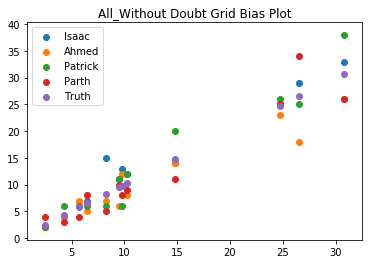

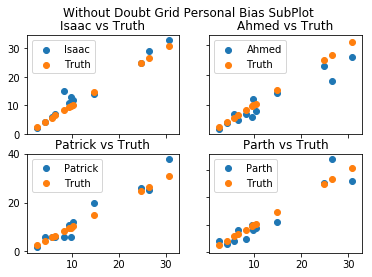

In [3]:


# 100 points average vs 400 points average

#100pts
Main_Data=data[data["QC/Main"]=="Main"]
Average_Main=Main_Data.groupby('Year-Loc-Tape-Order').mean()
# print(Average_Main)


#400pts

Isaac_Data=data[data["Reader"]=="Isaac"]
Average_Isaac=Isaac_Data.groupby('Year-Loc-Tape-Order').mean()
# print(Average_Isaac)
Ahmed_Data=data[data["Reader"]=="Ahmed"]
Average_Ahmed=Ahmed_Data.groupby('Year-Loc-Tape-Order').mean()
# print(Average_Ahmed)
Patrick_Data=data[data["Reader"]=="Patrick"]
Average_Patrick=Patrick_Data.groupby('Year-Loc-Tape-Order').mean()
# print(Average_Patrick)
Parth_Data=data[data["Reader"]=="Parth"]
Average_Parth=Parth_Data.groupby('Year-Loc-Tape-Order').mean()
# print(Average_Parth)

WD_Grid_All=(Average_Isaac['Percent Residue for the Image (Without Doubt)']+Average_Ahmed['Percent Residue for the Image (Without Doubt)']+Average_Patrick['Percent Residue for the Image (Without Doubt)']+Average_Parth['Percent Residue for the Image (Without Doubt)'])/4
Final_Grid__All= (Average_Isaac['Final Grid Residue Count']+Average_Ahmed['Final Grid Residue Count']+Average_Patrick['Final Grid Residue Count']+Average_Parth['Final Grid Residue Count'])/4
JC_Estimation_All= (Average_Isaac['Visual Estimated Percentage']+Average_Ahmed['Visual Estimated Percentage']+Average_Patrick['Visual Estimated Percentage']+Average_Parth['Visual Estimated Percentage'])/4
Final_JC_Grid_All= (Average_Isaac['Final Average Residue Count (Grid + Visual)/2']+Average_Ahmed['Final Average Residue Count (Grid + Visual)/2']+Average_Patrick['Final Average Residue Count (Grid + Visual)/2']+Average_Parth['Final Average Residue Count (Grid + Visual)/2'])/4


#Visualization
import matplotlib.pyplot as plt
plt.title('All_Without Doubt Grid Bias Plot')
plt.scatter(WD_Grid_All,Average_Isaac['Percent Residue for the Image (Without Doubt)'],label='Isaac')
plt.scatter(WD_Grid_All,Average_Ahmed['Percent Residue for the Image (Without Doubt)'],label='Ahmed')
plt.scatter(WD_Grid_All,Average_Patrick['Percent Residue for the Image (Without Doubt)'],label='Patrick')
plt.scatter(WD_Grid_All,Average_Parth['Percent Residue for the Image (Without Doubt)'],label='Parth')
plt.scatter(WD_Grid_All,WD_Grid_All,label='Truth')
plt.legend(loc='upper left')

plt.show()

fig, axs = plt.subplots(2, 2)
fig.suptitle('Without Doubt Grid Personal Bias SubPlot')
axs[0, 0].scatter(WD_Grid_All,Average_Isaac['Percent Residue for the Image (Without Doubt)'],label='Isaac')
axs[0,0].scatter(WD_Grid_All,WD_Grid_All,label='Truth')
axs[0,0].legend(loc='upper left')
axs[0, 0].set_title('Isaac vs Truth')
axs[0, 1].scatter(WD_Grid_All,Average_Ahmed['Percent Residue for the Image (Without Doubt)'],label='Ahmed')
axs[0,1].scatter(WD_Grid_All,WD_Grid_All,label='Truth')
axs[0,1].legend(loc='upper left')
axs[0, 1].set_title('Ahmed vs Truth')
axs[1, 0].scatter(WD_Grid_All,Average_Patrick['Percent Residue for the Image (Without Doubt)'],label='Patrick')
axs[1,0].scatter(WD_Grid_All,WD_Grid_All,label='Truth')
axs[1,0].legend(loc='upper left')
axs[1, 0].set_title('Patrick vs Truth')
axs[1, 1].scatter(WD_Grid_All,Average_Parth['Percent Residue for the Image (Without Doubt)'],label='Parth')
axs[1,1].scatter(WD_Grid_All,WD_Grid_All,label='Truth')
axs[1,1].legend(loc='upper left')
axs[1, 1].set_title('Parth vs Truth')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
plt.show()








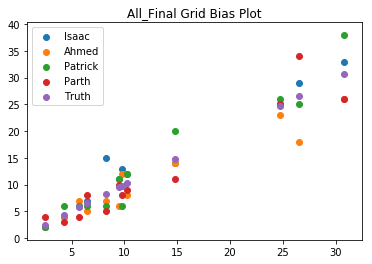

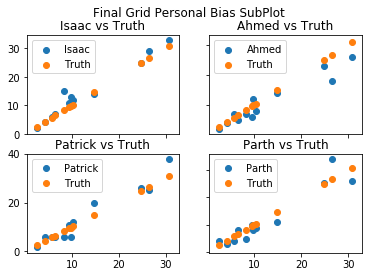

In [4]:
#Visualization
import matplotlib.pyplot as plt
plt.title('All_Final Grid Bias Plot')
plt.scatter(WD_Grid_All,Average_Isaac['Final Grid Residue Count'],label='Isaac')
plt.scatter(WD_Grid_All,Average_Ahmed['Final Grid Residue Count'],label='Ahmed')
plt.scatter(WD_Grid_All,Average_Patrick['Final Grid Residue Count'],label='Patrick')
plt.scatter(WD_Grid_All,Average_Parth['Final Grid Residue Count'],label='Parth')
plt.scatter(WD_Grid_All,WD_Grid_All,label='Truth')
plt.legend(loc='upper left')

plt.show()

fig, axs = plt.subplots(2, 2)
fig.suptitle('Final Grid Personal Bias SubPlot')
axs[0, 0].scatter(WD_Grid_All,Average_Isaac['Final Grid Residue Count'],label='Isaac')
axs[0,0].scatter(WD_Grid_All,WD_Grid_All,label='Truth')
axs[0,0].legend(loc='upper left')
axs[0, 0].set_title('Isaac vs Truth')
axs[0, 1].scatter(WD_Grid_All,Average_Ahmed['Final Grid Residue Count'],label='Ahmed')
axs[0,1].scatter(WD_Grid_All,WD_Grid_All,label='Truth')
axs[0,1].legend(loc='upper left')
axs[0, 1].set_title('Ahmed vs Truth')
axs[1, 0].scatter(WD_Grid_All,Average_Patrick['Final Grid Residue Count'],label='Patrick')
axs[1,0].scatter(WD_Grid_All,WD_Grid_All,label='Truth')
axs[1,0].legend(loc='upper left')
axs[1, 0].set_title('Patrick vs Truth')
axs[1, 1].scatter(WD_Grid_All,Average_Parth['Final Grid Residue Count'],label='Parth')
axs[1,1].scatter(WD_Grid_All,WD_Grid_All,label='Truth')
axs[1,1].legend(loc='upper left')
axs[1, 1].set_title('Parth vs Truth')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
plt.show()

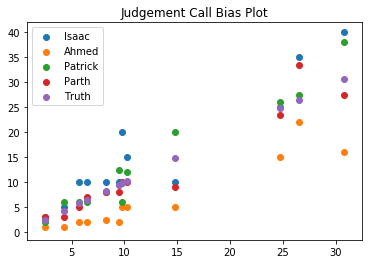

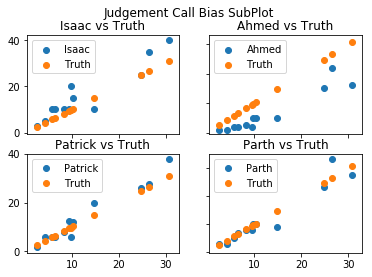

In [5]:
#Visualization
import matplotlib.pyplot as plt
plt.title('Judgement Call Bias Plot')
plt.scatter(WD_Grid_All,Average_Isaac['Visual Estimated Percentage'],label='Isaac')
plt.scatter(WD_Grid_All,Average_Ahmed['Visual Estimated Percentage'],label='Ahmed')
plt.scatter(WD_Grid_All,Average_Patrick['Visual Estimated Percentage'],label='Patrick')
plt.scatter(WD_Grid_All,Average_Parth['Visual Estimated Percentage'],label='Parth')
plt.scatter(WD_Grid_All,WD_Grid_All,label='Truth')
plt.legend(loc='upper left')

plt.show()

fig, axs = plt.subplots(2, 2)
fig.suptitle('Judgement Call Bias SubPlot')
axs[0, 0].scatter(WD_Grid_All,Average_Isaac['Visual Estimated Percentage'],label='Isaac')
axs[0,0].scatter(WD_Grid_All,WD_Grid_All,label='Truth')
axs[0,0].legend(loc='upper left')
axs[0, 0].set_title('Isaac vs Truth')
axs[0, 1].scatter(WD_Grid_All,Average_Ahmed['Visual Estimated Percentage'],label='Ahmed')
axs[0,1].scatter(WD_Grid_All,WD_Grid_All,label='Truth')
axs[0,1].legend(loc='upper left')
axs[0, 1].set_title('Ahmed vs Truth')
axs[1, 0].scatter(WD_Grid_All,Average_Patrick['Visual Estimated Percentage'],label='Patrick')
axs[1,0].scatter(WD_Grid_All,WD_Grid_All,label='Truth')
axs[1,0].legend(loc='upper left')
axs[1, 0].set_title('Patrick vs Truth')
axs[1, 1].scatter(WD_Grid_All,Average_Parth['Visual Estimated Percentage'],label='Parth')
axs[1,1].scatter(WD_Grid_All,WD_Grid_All,label='Truth')
axs[1,1].legend(loc='upper left')
axs[1, 1].set_title('Parth vs Truth')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
plt.show()

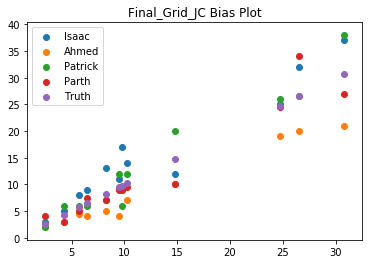

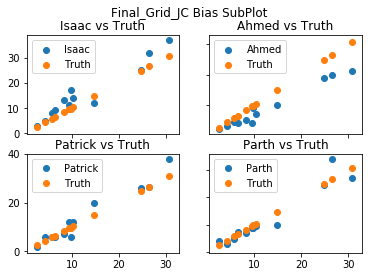

In [6]:
#Visualization
import matplotlib.pyplot as plt
plt.title('Final_Grid_JC Bias Plot')
plt.scatter(WD_Grid_All,Average_Isaac['Final Average Residue Count (Grid + Visual)/2'],label='Isaac')
plt.scatter(WD_Grid_All,Average_Ahmed['Final Average Residue Count (Grid + Visual)/2'],label='Ahmed')
plt.scatter(WD_Grid_All,Average_Patrick['Final Average Residue Count (Grid + Visual)/2'],label='Patrick')
plt.scatter(WD_Grid_All,Average_Parth['Final Average Residue Count (Grid + Visual)/2'],label='Parth')
plt.scatter(WD_Grid_All,WD_Grid_All,label='Truth')
plt.legend(loc='upper left')

plt.show()

fig, axs = plt.subplots(2, 2)
fig.suptitle('Final_Grid_JC Bias SubPlot')
axs[0, 0].scatter(WD_Grid_All,Average_Isaac['Final Average Residue Count (Grid + Visual)/2'],label='Isaac')
axs[0,0].scatter(WD_Grid_All,WD_Grid_All,label='Truth')
axs[0,0].legend(loc='upper left')
axs[0, 0].set_title('Isaac vs Truth')
axs[0, 1].scatter(WD_Grid_All,Average_Ahmed['Final Average Residue Count (Grid + Visual)/2'],label='Ahmed')
axs[0,1].scatter(WD_Grid_All,WD_Grid_All,label='Truth')
axs[0,1].legend(loc='upper left')
axs[0, 1].set_title('Ahmed vs Truth')
axs[1, 0].scatter(WD_Grid_All,Average_Patrick['Final Average Residue Count (Grid + Visual)/2'],label='Patrick')
axs[1,0].scatter(WD_Grid_All,WD_Grid_All,label='Truth')
axs[1,0].legend(loc='upper left')
axs[1, 0].set_title('Patrick vs Truth')
axs[1, 1].scatter(WD_Grid_All,Average_Parth['Final Average Residue Count (Grid + Visual)/2'],label='Parth')
axs[1,1].scatter(WD_Grid_All,WD_Grid_All,label='Truth')
axs[1,1].legend(loc='upper left')
axs[1, 1].set_title('Parth vs Truth')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
plt.show()

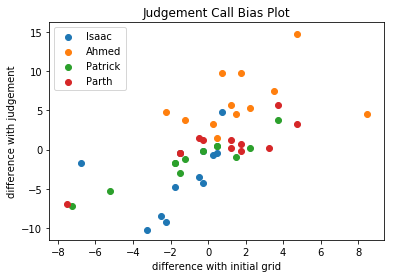

In [7]:
#Visualization
import matplotlib.pyplot as plt
plt.title('Judgement Call Bias Plot')
plt.xlabel('difference with initial grid')
plt.ylabel('difference with judgement')
plt.scatter(WD_Grid_All-Average_Isaac['Final Grid Residue Count'],WD_Grid_All-Average_Isaac['Visual Estimated Percentage'],label='Isaac')
plt.scatter(WD_Grid_All-Average_Ahmed['Final Grid Residue Count'],WD_Grid_All-Average_Ahmed['Visual Estimated Percentage'],label='Ahmed')
plt.scatter(WD_Grid_All-Average_Patrick['Final Grid Residue Count'],WD_Grid_All-Average_Patrick['Visual Estimated Percentage'],label='Patrick')
plt.scatter(WD_Grid_All-Average_Parth['Final Grid Residue Count'],WD_Grid_All-Average_Parth['Visual Estimated Percentage'],label='Parth')
plt.legend(loc='upper left')

plt.show()

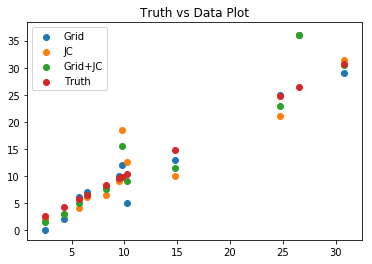

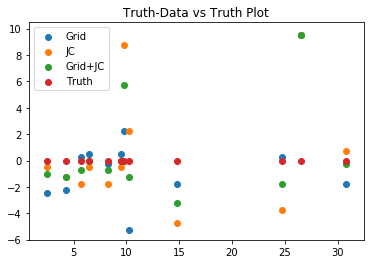

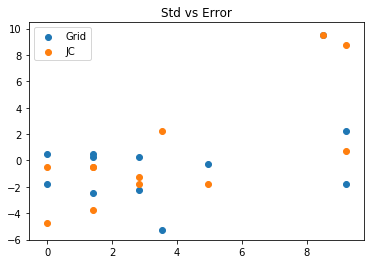

In [8]:
# 100 points average vs 400 points average

#100pts
Main_Data=data[data["QC/Main"]=="Main"]
Average_Main=Main_Data.groupby('Year-Loc-Tape-Order').mean()
Std_Main=Main_Data.groupby('Year-Loc-Tape-Order').std()
# print(Average_Main)
# print(Std_Main['Visual Estimated Percentage'])
# print(Average_Main)


#Visualization Main Data
import matplotlib.pyplot as plt
plt.title('Truth vs Data Plot')

plt.scatter(WD_Grid_All,Average_Main['Final Grid Residue Count'],label='Grid')
plt.scatter(WD_Grid_All,Average_Main['Visual Estimated Percentage'],label='JC')
plt.scatter(WD_Grid_All,Average_Main['Final Average Residue Count (Grid + Visual)/2'],label='Grid+JC')
plt.scatter(WD_Grid_All,WD_Grid_All,label='Truth')
plt.legend(loc='upper left')
plt.show()

plt.title('Truth-Data vs Truth Plot')
plt.scatter(WD_Grid_All,Average_Main['Final Grid Residue Count']-WD_Grid_All,label='Grid')
plt.scatter(WD_Grid_All,Average_Main['Visual Estimated Percentage']-WD_Grid_All,label='JC')
plt.scatter(WD_Grid_All,Average_Main['Final Average Residue Count (Grid + Visual)/2']-WD_Grid_All,label='Grid+JC')
plt.scatter(WD_Grid_All,WD_Grid_All-WD_Grid_All,label='Truth')
plt.legend(loc='upper left')
plt.show()

plt.title('Std vs Error')
plt.scatter(Std_Main['Visual Estimated Percentage'],Average_Main['Final Grid Residue Count']-WD_Grid_All,label='Grid')
plt.scatter(Std_Main['Visual Estimated Percentage'],Average_Main['Visual Estimated Percentage']-WD_Grid_All,label='JC')
plt.legend(loc='upper left')
plt.show()


# #Visualization
# import matplotlib.pyplot as plt
# plt.title('Judgement Call Bias Plot')
# plt.xlabel('difference with initial grid')
# plt.ylabel('difference with judgement')
# plt.scatter(WD_Grid_All-Average_Main['Final Grid Residue Count'],WD_Grid_All-Average_Main['Visual Estimated Percentage'],label='Main')

# plt.legend(loc='upper left')

# plt.show()

                     Number of points  ...  Final Average Residue Count (Grid + Visual)/2
Year-Loc-Tape-Order                    ...                                               
2018-L07-1-1                     50.0  ...                                           11.0
2018-L07-1-13                    50.0  ...                                           21.0
2018-L07-3-4                     50.0  ...                                            4.0
2018-L07-3-50                    50.0  ...                                            2.0
2018-L09-2-12                    50.0  ...                                           23.0
2018-L09-2-27                    50.0  ...                                           12.0

[6 rows x 5 columns]
                     Number of points  ...  Final Average Residue Count (Grid + Visual)/2
Year-Loc-Tape-Order                    ...                                               
2018-L07-2-36                    50.0  ...                                    

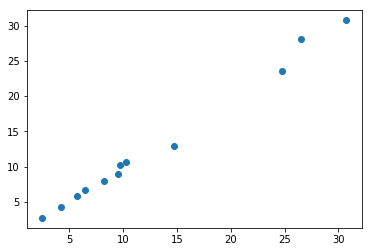

In [9]:

Isaac_Data_m=Main_Data[Main_Data["Reader"]=="Isaac"]
Average_Isaac_m=Isaac_Data_m.groupby('Year-Loc-Tape-Order').mean()
print(Average_Isaac_m)
Ahmed_Data_m=Main_Data[Main_Data["Reader"]=="Ahmed"]
Average_Ahmed_m=Ahmed_Data_m.groupby('Year-Loc-Tape-Order').mean()
print(Average_Ahmed_m)
Patrick_Data_m=Main_Data[Main_Data["Reader"]=="Patrick"]
Average_Patrick_m=Patrick_Data_m.groupby('Year-Loc-Tape-Order').mean()
print(Average_Patrick_m)
Parth_Data_m=Main_Data[Main_Data["Reader"]=="Parth"]
Average_Parth_m=Parth_Data_m.groupby('Year-Loc-Tape-Order').mean()
print(Average_Parth_m)


plt.scatter(WD_Grid_All,Final_JC_Grid_All)
plt.show()

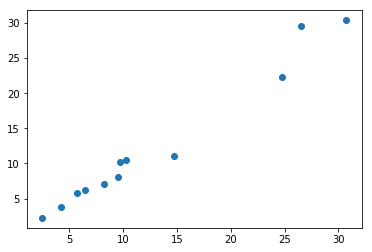

In [10]:
plt.scatter(WD_Grid_All,JC_Estimation_All)
plt.show()
